In [9]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from scipy.stats import chi2_contingency

# Hypothesis testing: Chi-Square Test within the Eniac case study

In this notebook we perform a chi-square test with the data from the Eniac case study, applying a post-hoc correction to perform pairwise tests and find the true winner.

## 1.&nbsp;State the Null Hypothesis and the Alternative Hypothesis.

Null Hypothesis : All four button versions have equal true click-through rates (CTR)

Alternative Hyphotesis : All four button versions do not have equal true click-through rates (CTR). At least one of the versions have a better or worst CTR.

## 2.&nbsp; Select an appropriate significance level alpha ($\alpha$).

It was decided that a relatively high alpha was acceptable in this case

In [21]:
alpha = 0.05

## 3.&nbsp; Collect data that is random and independent

The important pieces of information (clicks on each element of interest & visits on each page) are scattered around. Let's collect them. Where are the .csv files? 🥸

In [22]:
# eniac_a_df.csv
url = "https://drive.google.com/file/d/1eguu0b-aXUbC_0IIrTQMMHj0buRNmgyv/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
eniac_a_df = pd.read_csv(path)

# eniac_b_df.csv
url = "https://drive.google.com/file/d/1P-gw9egIMsd5186pviXgJrBV9UtAcqa-/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
eniac_b_df = pd.read_csv(path)

# eniac_c_df.csv
url = "https://drive.google.com/file/d/15GSbArMzytzWxXhnHeMiYYvRIm7dsJfa/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
eniac_c_df = pd.read_csv(path)

# eniac_d_df.csv
url = "https://drive.google.com/file/d/1t9rLwgwS9hcVIz5GYzBCGqjU7XsV5uah/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
eniac_d_df = pd.read_csv(path)

In [185]:
eniac_a_df



,Element ID,Tag name,Name,No. clicks,Visible?,Snapshot information
0,48,h1,ENIAC,269,True,Homepage Version A - white SHOP NOW • http...
1,25,div,mySidebar,309,True,created 2021-09-14 • 14 days 0 hours 34 mi...
2,4,a,Mac,279,True,NaN
3,69,a,iPhone,246,True,NaN
4,105,a,Accessories,1235,True,NaN
5,36,a,Chargers & Cables,1261,False,NaN
6,99,a,iPhone Accessories,1226,False,NaN
7,68,a,Watch Accessories,1261,False,NaN
8,13,a,Mac Accessories,1308,False,NaN
9,15,a,AirTag,206,False,NaN


In [186]:
eniac_b_df

,Element ID,Tag name,Name,No. clicks,Visible?,Snapshot information
0,48,h1,ENIAC,236,True,Homepage Version B - red SHOP NOW • https:...
1,25,div,mySidebar,304,True,created 2021-10-27 • 14 days 0 hours 34 mi...
2,4,a,Mac,268,True,NaN
3,69,a,iPhone,260,True,NaN
4,105,a,Accessories,1214,True,NaN
5,36,a,Chargers & Cables,1259,False,NaN
6,99,a,iPhone Accessories,1237,False,NaN
7,68,a,Watch Accessories,1221,False,NaN
8,13,a,Mac Accessories,1210,False,NaN
9,15,a,AirTag,195,False,NaN


In [187]:
eniac_c_df

,Element ID,Tag name,Name,No. clicks,Visible?,Snapshot information
0,48,h1,ENIAC,288,True,Homepage Version C - white SEE DEALS • htt...
1,25,div,mySidebar,283,True,created 2021-10-27 • 14 days 0 hours 34 mi...
2,4,a,Mac,262,True,NaN
3,69,a,iPhone,234,True,NaN
4,105,a,Accessories,1288,True,NaN
5,36,a,Chargers & Cables,1224,False,NaN
6,99,a,iPhone Accessories,1175,False,NaN
7,68,a,Watch Accessories,1264,False,NaN
8,13,a,Mac Accessories,1203,False,NaN
9,15,a,AirTag,202,False,NaN


In [188]:
eniac_d_df

,Element ID,Tag name,Name,No. clicks,Visible?,Snapshot information
0,48,h1,ENIAC,285,True,Homepage Version D - red SEE DEALS • https...
1,25,div,mySidebar,305,True,created 2021-10-27 • 14 days 0 hours 34 mi...
2,4,a,Mac,274,True,NaN
3,69,a,iPhone,243,True,NaN
4,105,a,Accessories,1267,True,NaN
5,36,a,Chargers & Cables,1260,False,NaN
6,99,a,iPhone Accessories,1296,False,NaN
7,68,a,Watch Accessories,1252,False,NaN
8,13,a,Mac Accessories,1273,False,NaN
9,15,a,AirTag,201,False,NaN


In [27]:
Click_ENIAC = [512, 281, 527, 193]
No_click_ENIAC = [24814, 24466, 24349, 25040]

observed_results_ENIAC = pd.DataFrame(
    [Click_ENIAC, No_click_ENIAC], columns=["VERSION_A", "VERSION_B", "VERSION_C", "VERSION_D"], index=["Click_ENIAC", "No-click_ENIAC"]
)
observed_results_ENIAC

,VERSION_A,VERSION_B,VERSION_C,VERSION_D
Click_ENIAC,512,281,527,193
No-click_ENIAC,24814,24466,24349,25040


In [36]:
#alternative with pandas filter function:
eniac_a_df.loc[eniac_a_df['Name'] == 'SHOP NOW', 'No. clicks'].values[0]

np.int64(512)

In [42]:
eniac_b_df.loc[eniac_b_df['Name'] == 'SHOP NOW', 'No. clicks'].values[0]

np.int64(281)

In [43]:
eniac_c_df.loc[eniac_c_df['Name'] == 'SEE DEALS', 'No. clicks'].values[0]

np.int64(527)

In [44]:
eniac_d_df.loc[eniac_d_df['Name'] == 'SEE DEALS', 'No. clicks'].values[0]

np.int64(193)

## 4.&nbsp; Calculate the test result

In [18]:
from scipy import stats
chisq_ENIAC, pvalue_ENIAC, df, expected = stats.chi2_contingency(observed_results_ENIAC)
chisq_ENIAC, pvalue_ENIAC, df, expected

(np.float64(224.01877488058412),
 np.float64(2.7161216607868712e-48),
 3,
 array([[  382.48625502,   373.74189974,   375.69012397,   381.08172127],
        [24943.51374498, 24373.25810026, 24500.30987603, 24851.91827873]]))

In [14]:
chisq_ENIAC

np.float64(224.01877488058412)

In [15]:
pvalue_ENIAC

np.float64(2.7161216607868712e-48)

In [16]:
df

3

In [17]:
expected

array([[  382.48625502,   373.74189974,   375.69012397,   381.08172127],
       [24943.51374498, 24373.25810026, 24500.30987603, 24851.91827873]])

## 5.&nbsp; Interpret the test result

In [19]:
if pvalue_ENIAC > alpha:
    print("The p-value is larger than alpha.")
else:
    print("The p-value is smaller than alpha.")

The p-value is smaller than alpha.


In [20]:
if pvalue_ENIAC < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


In [ ]:
#All four button versions do not have equal true click-through rates (CTR). At least one of the versions have a better or worst CTR or perform better/worst than others.

## How do we decide who's the winner?

perform post-hoc test

In [46]:
adjusted_alpha = alpha / 6
adjusted_alpha

0.008333333333333333

In [59]:
observed_results_ENIAC

,VERSION_A,VERSION_B,VERSION_C,VERSION_D
Click_ENIAC,512,281,527,193
No-click_ENIAC,24814,24466,24349,25040


Creating 6 versions

In [141]:
#using original data ; SPLIT from the observed results
#original_data = {'VERSION_A': [512, 24814],'VERSION_B': [281, 24466],'VERSION_C': [527, 24349],'VERSION_D': [193, 25040]}
#index_click = ['Click_ENIAC', 'No-click_ENIAC']

In [142]:
#in dictionary of list format:
#original_data

In [143]:
#convert to dataframe
#df = pd.DataFrame(original_data, index=index_click)
#df

In [121]:
#Version A and B
AB_df = observed_results_ENIAC[['VERSION_A', 'VERSION_B']]
AB_df.index = ['Click_AB', 'No_Click_AB']
print(AB_df)

             VERSION_A  VERSION_B
Click_AB           512        281
No_Click_AB      24814      24466


In [122]:
#Version A and C
AC_df = observed_results_ENIAC[['VERSION_A', 'VERSION_C']]
AC_df.index = ['Click_AC', 'No_Click_AC']
print(AC_df)

             VERSION_A  VERSION_C
Click_AC           512        527
No_Click_AC      24814      24349


In [123]:
#Version A and D
AD_df = observed_results_ENIAC[['VERSION_A', 'VERSION_D']]
AD_df.index = ['Click_AD', 'No_Click_AD']
print(AD_df)

             VERSION_A  VERSION_D
Click_AD           512        193
No_Click_AD      24814      25040


In [124]:
#Version B and C
BC_df = observed_results_ENIAC[['VERSION_B', 'VERSION_C']]
BC_df.index = ['Click_BC', 'No_Click_BC']
print(BC_df)

             VERSION_B  VERSION_C
Click_BC           281        527
No_Click_BC      24466      24349


In [125]:
#Version C and D
CD_df = observed_results_ENIAC[['VERSION_C', 'VERSION_D']]
CD_df.index = ['Click_CD', 'No_Click_CD']
print(CD_df)

             VERSION_C  VERSION_D
Click_CD           527        193
No_Click_CD      24349      25040


In [126]:
#Version B and D
BD_df = observed_results_ENIAC[['VERSION_B', 'VERSION_D']]
BD_df.index = ['Click_BD', 'No_Click_BD']
print(BD_df)

             VERSION_B  VERSION_D
Click_BD           281        193
No_Click_BD      24466      25040


Adjusted alpha

In [127]:
adjusted_alpha

0.008333333333333333

In [128]:
from scipy import stats

Version A-B

In [129]:
chisq_AB, pvalue_AB, df, expected = stats.chi2_contingency(AB_df)
chisq_AB, pvalue_AB, df, expected

(np.float64(62.49362285550828),
 np.float64(2.6730880539675666e-15),
 1,
 array([[  401.08477623,   391.91522377],
        [24924.91522377, 24355.08477623]]))

Version A-B RESULT

In [130]:
if pvalue_AB < adjusted_alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


Version A-C

In [131]:
chisq_AC, pvalue_AC, df, expected = stats.chi2_contingency(AC_df)
chisq_AC, pvalue_AC, df, expected

(np.float64(0.5342102943321849),
 np.float64(0.464842123017306),
 1,
 array([[  524.15668698,   514.84331302],
        [24801.84331302, 24361.15668698]]))

Version A-C RESULT

In [132]:
if pvalue_AC < adjusted_alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Fail to reject the null hypothesis


Version A-D

In [133]:
chisq_AD, pvalue_AD, df, expected = stats.chi2_contingency(AD_df)
chisq_AD, pvalue_AD, df, expected

(np.float64(144.28318375013012),
 np.float64(3.0808983951735623e-33),
 1,
 array([[  353.14840088,   351.85159912],
        [24972.85159912, 24881.14840088]]))

Version A-D RESULT

In [134]:
if pvalue_AD < adjusted_alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


Version B-C

In [135]:
chisq_BC, pvalue_BC, df, expected = stats.chi2_contingency(BC_df)
chisq_BC, pvalue_BC, df, expected

(np.float64(74.2291724194565),
 np.float64(6.955480170773988e-18),
 1,
 array([[  402.9497612,   405.0502388],
        [24344.0502388, 24470.9497612]]))

Version B-C RESULT

In [136]:
if pvalue_BC < adjusted_alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


Version C-D

In [137]:
chisq_CD, pvalue_CD, df, expected = stats.chi2_contingency(CD_df)
chisq_CD, pvalue_CD, df, expected

(np.float64(161.1170410120536),
 np.float64(6.450501398841206e-37),
 1,
 array([[  357.43519128,   362.56480872],
        [24518.56480872, 24870.43519128]]))

Version C-D RESULT

In [138]:
if pvalue_CD < adjusted_alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


Version B-D

In [139]:
chisq_BD, pvalue_BD, df, expected = stats.chi2_contingency(BD_df)
chisq_BD, pvalue_BD, df, expected

(np.float64(17.876339585535256),
 np.float64(2.3573374085176145e-05),
 1,
 array([[  234.69543818,   239.30456182],
        [24512.30456182, 24993.69543818]]))

Version B-D RESULT

In [140]:
if pvalue_BD < adjusted_alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


VERSION A-C is not statistically significant, as p-value is larger than adjusted alpha

ALTERNATIVE:

In [159]:
import pandas as pd
from scipy.stats import chi2_contingency
from itertools import combinations

In [160]:
#using original data ; SPLIT from the observed results
original_data = {'VERSION_A': [512, 24814],'VERSION_B': [281, 24466],'VERSION_C': [527, 24349],'VERSION_D': [193, 25040]}
index_click = ['Click_ENIAC', 'No-click_ENIAC']

In [161]:
eniac_buttonclicks_df = pd.DataFrame(original_data, index=index_click)
eniac_buttonclicks_df

,VERSION_A,VERSION_B,VERSION_C,VERSION_D
Click_ENIAC,512,281,527,193
No-click_ENIAC,24814,24466,24349,25040


In [176]:
versionpairs_click = [('VERSION_A', 'VERSION_B'),('VERSION_A', 'VERSION_C'),('VERSION_A', 'VERSION_D'),('VERSION_B', 'VERSION_C'),('VERSION_B', 'VERSION_D'),('VERSION_C', 'VERSION_D')]
versionpairs_click

[('VERSION_A', 'VERSION_B'),
 ('VERSION_A', 'VERSION_C'),
 ('VERSION_A', 'VERSION_D'),
 ('VERSION_B', 'VERSION_C'),
 ('VERSION_B', 'VERSION_D'),
 ('VERSION_C', 'VERSION_D')]

In [174]:
alpha = 0.05
adjusted_alpha = alpha / len(versionpairs_click)
adjusted_alpha

0.008333333333333333

In [183]:
for Value1, Value2 in versionpairs_click:
    pair_table = eniac_buttonclicks_df[[Value1, Value2]].values
    chisq, pval, dof, expected = chi2_contingency(pair_table)

    decision = "we reject the null hypothesis" if pval < adjusted_alpha else "we fail to reject the null hypothesis"

    print(f"SUMMARY {Value1} vs {Value2}:")
    print(f"  Chi-squared = {chisq:.4f}, p-value = {pval:.4f}, df = {dof}, adjusted alpha = {adjusted_alpha:.4f}")
    print(f"  Therefore, {decision}.\n")

SUMMARY VERSION_A vs VERSION_B:
  Chi-squared = 62.4936, p-value = 0.0000, df = 1, adjusted alpha = 0.0083
  Therefore, we reject the null hypothesis.

SUMMARY VERSION_A vs VERSION_C:
  Chi-squared = 0.5342, p-value = 0.4648, df = 1, adjusted alpha = 0.0083
  Therefore, we fail to reject the null hypothesis.

SUMMARY VERSION_A vs VERSION_D:
  Chi-squared = 144.2832, p-value = 0.0000, df = 1, adjusted alpha = 0.0083
  Therefore, we reject the null hypothesis.

SUMMARY VERSION_B vs VERSION_C:
  Chi-squared = 74.2292, p-value = 0.0000, df = 1, adjusted alpha = 0.0083
  Therefore, we reject the null hypothesis.

SUMMARY VERSION_B vs VERSION_D:
  Chi-squared = 17.8763, p-value = 0.0000, df = 1, adjusted alpha = 0.0083
  Therefore, we reject the null hypothesis.

SUMMARY VERSION_C vs VERSION_D:
  Chi-squared = 161.1170, p-value = 0.0000, df = 1, adjusted alpha = 0.0083
  Therefore, we reject the null hypothesis.



**Statistically Significant Differences (p < adjusted alpha = 0.0083)**
**VERSION C perform statistically as well as VERSION A.** Their performance are not equal but there is a lack of evidence that they are different or which one is better, A or C.
Recommended to choose either VERSION_A or VERSION_C as the feasible web design
VERSION B and D perform statistically worst than version A and C and to be rejected


**After performing post-hoc tests, do you have a single variant winner?**

unconsider version B because drop-off rate and homepage-return rate are unknown.
unconsider version D because of high drop-off rate and high homepage-return rate.

p-value < alpha differences are not due to chance or random
p-value of B and D (0.000) shows statistically and significantly worst in performing than A and C. p-value 0.000 means the version is not working

In [190]:
#list
visitors = {'VERSION_A': 25326,'VERSION_B': 24747,'VERSION_C': 24876,'VERSION_D': 25233}

In [192]:
#convert to series
visitors_series = pd.Series(visitors)
visitors_series

,0
VERSION_A,25326
VERSION_B,24747
VERSION_C,24876
VERSION_D,25233


In [193]:
clicks = {'VERSION_A': 512,'VERSION_B': 281,'VERSION_C': 527,'VERSION_D': 193}

In [195]:
clicks_series = pd.Series(clicks)
clicks_series

,0
VERSION_A,512
VERSION_B,281
VERSION_C,527
VERSION_D,193


In [196]:
ctr = (clicks_series / visitors_series) * 100
ctr

,0
VERSION_A,2.021638
VERSION_B,1.135491
VERSION_C,2.118508
VERSION_D,0.764871


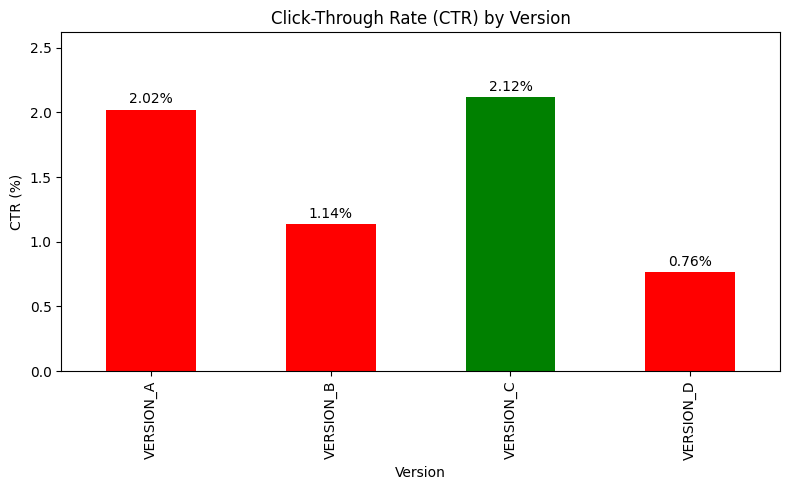

In [220]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
ctr.plot(kind='bar', color=['red', 'red', 'green', 'red'])

plt.title('Click-Through Rate (CTR) by Version')
plt.xlabel('Version')
plt.ylabel('CTR (%)')
plt.ylim(0, max(ctr) + 0.5)  # Add a little space on top for clarity

# Show exact values on top of bars
for index, value in enumerate(ctr):
    plt.text(index, value + 0.05, f'{value:.2f}%', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

VERSION B and D show low CTR rate, underperforming, so can be disqualified

MANUAL APPROACH

In [199]:
eniac_buttonclicks_df

,VERSION_A,VERSION_B,VERSION_C,VERSION_D
Click_ENIAC,512,281,527,193
No-click_ENIAC,24814,24466,24349,25040


In [200]:
# Calculate row totals - stored as a vertical DataFrame
row_totals = eniac_buttonclicks_df.sum(axis=1).to_frame()

# Calculate column totals - stored as a horizontal DataFrame
column_totals = eniac_buttonclicks_df.sum(axis=0).to_frame().T

# Calculate the grand total - a single value
grand_total = eniac_buttonclicks_df.values.sum()

# Calculate the population proportions
proportions = column_totals/grand_total

# Multiply proportions by row totals to get expected values
expected_buttonclicks = row_totals.dot(proportions)

expected_buttonclicks

,VERSION_A,VERSION_B,VERSION_C,VERSION_D
Click_ENIAC,382.486255,373.7419,375.690124,381.081721
No-click_ENIAC,24943.513745,24373.2581,24500.309876,24851.918279


In [201]:
#Calculating the Chi-squared statistic

chi_squared_buttonclicks = (
    ((eniac_buttonclicks_df - expected_buttonclicks) ** 2 / expected_buttonclicks)
    .sum() # add up the columns
    .sum() # add column sums together
)
chi_squared_buttonclicks

np.float64(224.01877488058415)

In [ ]:
#calculating degree of freedom

In [202]:
r = eniac_buttonclicks_df.shape[0]
r

2

In [203]:
n = eniac_buttonclicks_df.shape[1]
n

4

In [204]:
dof = (r - 1) * (n - 1)
dof

3

In [206]:
alpha

0.05

In [207]:
critical_value_buttonclicks = 7.815

In [210]:
chisq_ENIAC

np.float64(224.01877488058412)

In [209]:
chisq_ENIAC == chi_squared_buttonclicks

np.False_

In [211]:
if abs(chisq_ENIAC) > abs(critical_value_buttonclicks):
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


Conform with the first general test, we reject the Null Hypothesis.
All four button versions do not have equal true click-through rates (CTR). At least one of the versions have a better or worst CTR or perform better/worst than others.

In [212]:
versionpairs_click = [('VERSION_A', 'VERSION_B'),('VERSION_A', 'VERSION_C'),('VERSION_A', 'VERSION_D'),('VERSION_B', 'VERSION_C'),('VERSION_B', 'VERSION_D'),('VERSION_C', 'VERSION_D')]
versionpairs_click

[('VERSION_A', 'VERSION_B'),
 ('VERSION_A', 'VERSION_C'),
 ('VERSION_A', 'VERSION_D'),
 ('VERSION_B', 'VERSION_C'),
 ('VERSION_B', 'VERSION_D'),
 ('VERSION_C', 'VERSION_D')]

In [213]:
eniac_buttonclicks_df

,VERSION_A,VERSION_B,VERSION_C,VERSION_D
Click_ENIAC,512,281,527,193
No-click_ENIAC,24814,24466,24349,25040


In [215]:
critical_value_buttonclicks = 7.815